In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Import the data #
df = pd.read_csv("../Final Project/Datasets/encounters-by-facility_2012-2023_20240702.csv")

In [5]:
# Preprocess the data
df['year'] = pd.to_datetime(df['year'], format='%Y')
df['count'] = pd.to_numeric(df['count'], errors='coerce')

In [7]:
# Filter out rows with missing counts 
df = df.dropna(subset=['count'])

In [9]:
# Group by year and type, then sum the counts
yearly_data = df.groupby(['year', 'type'])['count'].sum().unstack()

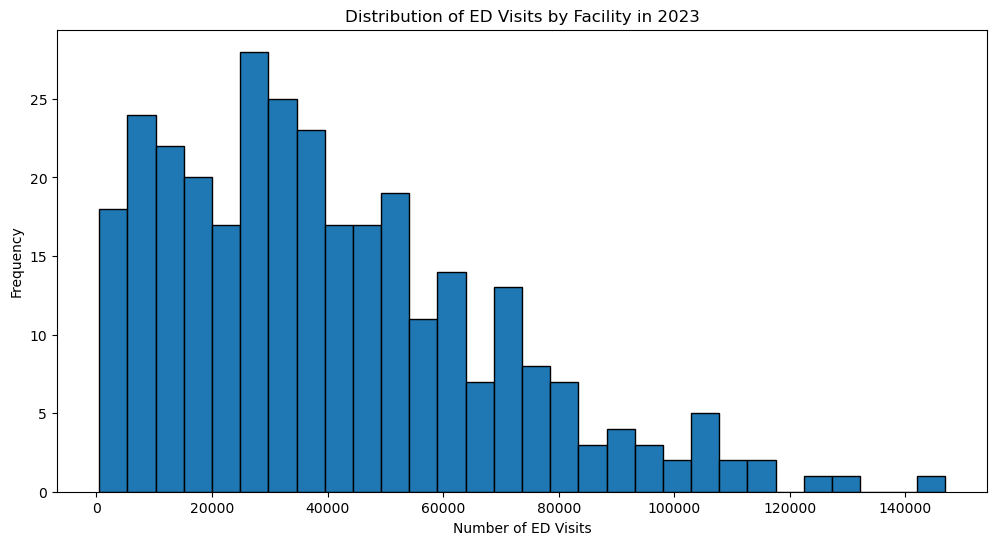

In [11]:
# Create a histogram of ED visits for the most recent year
latest_year = df['year'].max().year
latest_data = df[df['year'].dt.year == latest_year]

plt.figure(figsize=(12, 6))
plt.hist(latest_data[latest_data['type'] == 'ED_Visit']['count'], bins=30, edgecolor='black')
plt.title(f'Distribution of ED Visits by Facility in {latest_year}')
plt.xlabel('Number of ED Visits')
plt.ylabel('Frequency')
plt.show()

In [15]:
# Display basic statistics 
print(yearly_data.describe())

type       ED_Admit      ED_Visit
count  1.200000e+01  1.200000e+01
mean   1.923567e+06  1.186585e+07
std    8.463651e+04  1.020395e+06
min    1.817236e+06  1.002385e+07
25%    1.848272e+06  1.090536e+07
50%    1.922666e+06  1.232388e+07
75%    1.975248e+06  1.268193e+07
max    2.077082e+06  1.288175e+07
